<a href="https://colab.research.google.com/github/datasiyeon/Python_Fraud_Prediction_Model/blob/main/Fraud_Prediction_Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/2022유통판매데이터분석수업/

/content/drive/My Drive/2022유통판매데이터분석수업


In [6]:
data = pd.read_csv('Fraud_Data.csv') # Fraud_Data.csv 데이터 불러오기

In [8]:
# 데이터 탐색하기
data.isnull().sum() # 데이터 결측치 확인하기 ## 이 데이터는 정제된 거임, 원래는 데이터 전처리 해야함.

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [10]:
# The week of the year
data['s_week'] = pd.to_datetime(data['signup_time']).dt.isocalendar().week # signup_time 주 정보 뽑아내기
data['p_week'] = pd.to_datetime(data['purchase_time']).dt.isocalendar().week # purchase_time 주 정보 뽑아내기

In [11]:
# check the difference between the two dates (dt = purchase_time - signup_time)
data['dt'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).astype('timedelta64[D]') # 가입한 시간에서 구매하는 시점 빼기

In [33]:
data[['user_id', 'device_id']].groupby('device_id').count().sort_values(by='user_id', ascending=False)

,user_id
device_id,
KIPFSCNUGOLDP,20
NGQCKIADMZORL,20
CQTUVBYIWWWBC,20
ITUMJCKWEYNDD,20
EQYVNEGOFLAWK,20
...,...
IXVBQLPWSAIDA,1
IXUYCZZVDXGPO,1
IXUWTGATQJEVG,1


In [34]:
device_count = data[['user_id', 'device_id']].groupby('device_id').count().reset_index() 

In [38]:
device_count = device_count.rename(columns={'user_id': 'd_ct'}) # d_ct 이름을 이걸로 저장

In [45]:
data = data.merge(device_count, how='left', on='device_id')

In [18]:
ip_count = data[['user_id', 'ip_address']].groupby('ip_address').count().reset_index()
ip_count = ip_count.rename(columns={'user_id': 'ip_ct'})
data = data.merge(ip_count, how='left', on='ip_address')

In [19]:
t2= data.groupby(['class', 'ip_ct']).size().to_frame('size').reset_index().sort_values(['class', 'ip_ct'], ascending=False)

In [26]:
import io

In [30]:
ip = pd.read_csv('IpAddress_to_Country.csv')

In [31]:
#IP address to country mapping  ## IP mapping하기
countries = []
for i in range(len(data)):
  ip_address = data.loc[i, 'ip_address']
  tmp = ip[(ip['lower_bound_ip_address'] <= ip_address) &
                        (ip['upper_bound_ip_address'] >= ip_address)]
  if len(tmp) == 1:
    countries.append(tmp['country'].values[0])
  else:
    countries.append('NA')

data['country'] = countries

In [46]:
df = data[['s_week', 'p_week', 'purchase_value', 'source', 'browser', 'sex', 'age', 'country', 'd_ct', 'ip_ct', 'dt', 'class']]
df.head()

,s_week,p_week,purchase_value,source,browser,sex,age,country,d_ct,ip_ct,dt,class
0,9,16,34,SEO,Chrome,M,39,Japan,1,1,52.0,0
1,23,24,16,Ads,Chrome,F,53,United States,1,1,0.0,0
2,1,1,15,SEO,Opera,M,53,United States,12,12,0.0,1
3,18,19,44,SEO,Safari,M,41,NA,1,1,5.0,0
4,30,37,39,Ads,Safari,M,45,United States,1,1,50.0,0


In [47]:
path = '/content/drive/My Drive/2022유통판매데이터분석수업/output.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

In [50]:
!pip install pycaret -q
!pip install markupsafe==2.0.1 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [51]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [52]:
data = pd.read_csv('output.csv')

In [54]:
data.shape

(151112, 13)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      151112 non-null  int64  
 1   s_week          151112 non-null  int64  
 2   p_week          151112 non-null  int64  
 3   purchase_value  151112 non-null  int64  
 4   source          151112 non-null  object 
 5   browser         151112 non-null  object 
 6   sex             151112 non-null  object 
 7   age             151112 non-null  int64  
 8   country         129146 non-null  object 
 9   d_ct            151112 non-null  int64  
 10  ip_ct           151112 non-null  int64  
 11  dt              151112 non-null  float64
 12  class           151112 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 15.0+ MB


In [56]:
exp = setup(data, silent=True, target='class')

,Description,Value
0,session_id,1994
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(151112, 13)"
5,Missing Values,True
6,Numeric Features,6
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [58]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9561,0.8403,0.5378,0.9961,0.6985,0.6771,0.7147,32.640
lightgbm,Light Gradient Boosting Machine,0.9559,0.8386,0.5387,0.9910,0.6980,0.6764,0.7132,1.388
rf,Random Forest Classifier,0.9556,0.8401,0.5418,0.9784,0.6974,0.6755,0.7100,24.910
ada,Ada Boost Classifier,0.9549,0.8407,0.5395,0.9691,0.6931,0.6709,0.7046,9.130
knn,K Neighbors Classifier,0.9540,0.7699,0.5378,0.9559,0.6883,0.6656,0.6978,17.184
et,Extra Trees Classifier,0.9531,0.8339,0.5497,0.9233,0.6891,0.6655,0.6918,41.196
lr,Logistic Regression,0.9517,0.8395,0.5395,0.9141,0.6785,0.6543,0.6809,47.308
ridge,Ridge Classifier,0.9517,0.0000,0.5394,0.9147,0.6786,0.6544,0.6811,0.444
lda,Linear Discriminant Analysis,0.9517,0.8394,0.5394,0.9143,0.6785,0.6542,0.6809,5.996
svm,SVM - Linear Kernel,0.9513,0.0000,0.5419,0.9073,0.6779,0.6533,0.6791,10.708


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1994, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9562,0.8408,0.5375,0.9981,0.6988,0.6774,0.7153
1,0.9552,0.8351,0.5265,0.9981,0.6894,0.6677,0.7076
2,0.9558,0.8572,0.5320,1.0000,0.6945,0.6731,0.7122
3,0.9578,0.8449,0.5550,0.9982,0.7134,0.6926,0.7275
4,0.9587,0.8592,0.5660,0.9947,0.7215,0.7010,0.7336
5,0.9545,0.8327,0.5200,0.9981,0.6838,0.6619,0.7029
6,0.9564,0.8281,0.5440,0.9909,0.7024,0.6810,0.7168
7,0.9569,0.8341,0.5440,1.0000,0.7047,0.6836,0.7206
8,0.9552,0.8429,0.5265,0.9981,0.6894,0.6677,0.7076


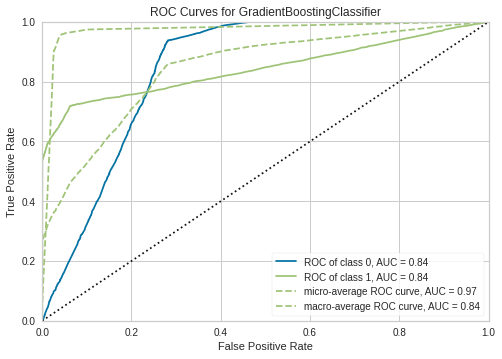

In [60]:
plot_model(model)

In [61]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9559,0.8352,0.5375,0.9926,0.6974,0.6759,0.7130
1,0.9551,0.8436,0.5275,0.9943,0.6893,0.6676,0.7067
2,0.9550,0.8573,0.5320,0.9852,0.6909,0.6690,0.7061
3,0.9578,0.8410,0.5550,0.9982,0.7134,0.6926,0.7275
4,0.9587,0.8578,0.5660,0.9947,0.7215,0.7010,0.7336
5,0.9542,0.8334,0.5190,0.9943,0.6820,0.6599,0.7006
6,0.9564,0.8258,0.5440,0.9909,0.7024,0.6810,0.7168
7,0.9568,0.8321,0.5440,0.9982,0.7042,0.6831,0.7198
8,0.9550,0.8403,0.5265,0.9943,0.6885,0.6667,0.7060


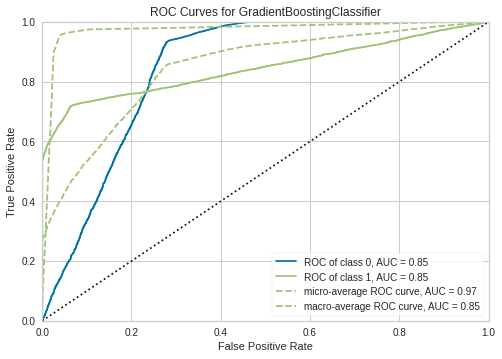

In [63]:
plot_model(tuned_model)

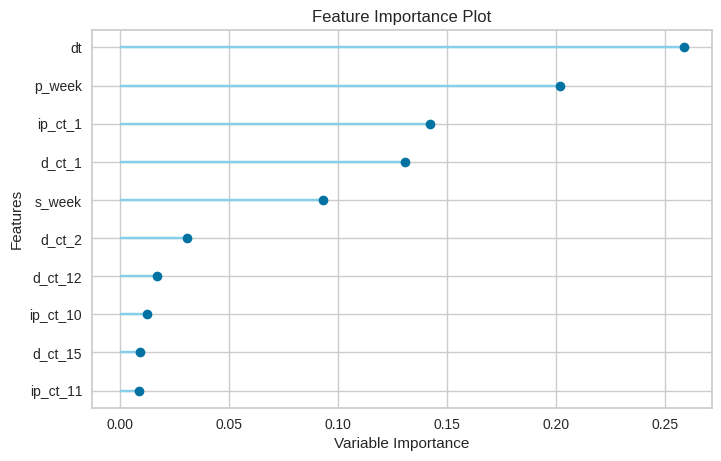

In [62]:
plot_model(tuned_model, plot='feature')

In [64]:
def calculate_profit(y, y_pred):
  tp = np.where((y_pred==1) & (y==1), (120-15), 0)
  fp = np.where((y_pred==1) & (y==0), -15, 0)
  fn = np.where((y_pred==0) & (y==1), -120, 0)
  return np.sum([tp,fp,fn])

add_metric('profit', 'Profit', calculate_profit)

Name                                                        Profit
Display Name                                                Profit
Score Function       <function calculate_profit at 0x7f605e78a950>
Scorer                               make_scorer(calculate_profit)
Target                                                        pred
Args                                                            {}
Greater is Better                                             True
Multiclass                                                    True
Custom                                                        True
Name: profit, dtype: object

In [65]:
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
dt,Decision Tree Classifier,0.9127,0.7700,0.5942,0.5346,0.5627,0.5144,0.5154,5934.0,3.396
et,Extra Trees Classifier,0.9532,0.8351,0.5495,0.9256,0.6895,0.6660,0.6926,2976.0,49.491
rf,Random Forest Classifier,0.9555,0.8414,0.5419,0.9770,0.6970,0.6751,0.7095,1738.5,29.111
lightgbm,Light Gradient Boosting Machine,0.9561,0.8416,0.5390,0.9938,0.6988,0.6774,0.7145,1227.0,1.251
svm,SVM - Linear Kernel,0.9491,0.0000,0.5441,0.8847,0.6697,0.6439,0.6685,1192.5,11.440
ada,Ada Boost Classifier,0.9548,0.8412,0.5394,0.9687,0.6928,0.6706,0.7042,1105.5,8.614
gbc,Gradient Boosting Classifier,0.9562,0.8413,0.5377,0.9971,0.6985,0.6772,0.7149,961.5,37.115
lr,Logistic Regression,0.9517,0.8404,0.5395,0.9142,0.6785,0.6542,0.6810,631.5,50.169
ridge,Ridge Classifier,0.9517,0.0000,0.5394,0.9146,0.6785,0.6543,0.6811,613.5,0.402
knn,K Neighbors Classifier,0.9541,0.7709,0.5376,0.9580,0.6886,0.6659,0.6985,609.0,10.556


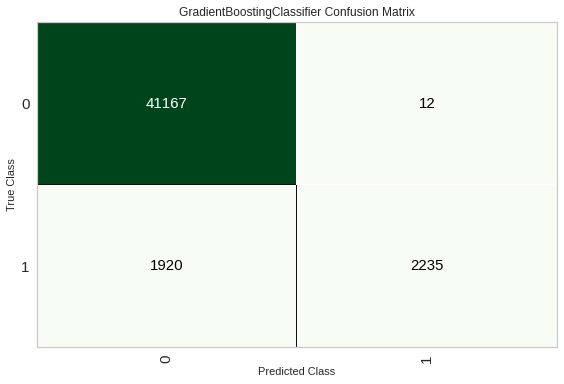

In [68]:
plot_model(tuned_model, plot = 'confusion_matrix')

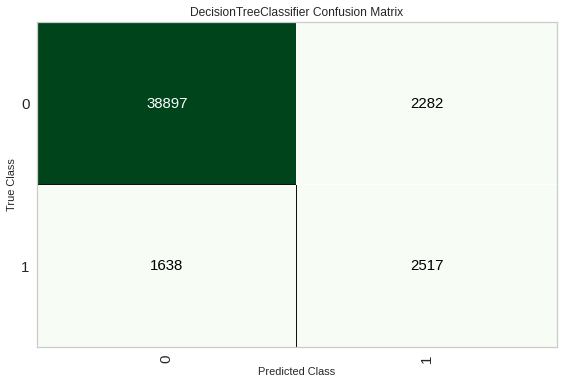

In [69]:
plot_model(best_model, plot = 'confusion_matrix')